# Churn

## Goal:

- Discover drivers of churn in Telco
- Use drivers to develop programs to retain clients.

# Imports

In [2]:
import pandas as pd
from scipy import stats
import wrangle as acq
import env
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from io import StringIO

# Acquire

- Data acquired from Codeup Database
- It contained 7043 rows and 31 columns before cleaning
- Each row represents a client from the customer database.
- Each column represents a feature of those customers

# Prepare

Prepare Actions:


Checked for nulls in the data (there were none)
Removed rows with nulls
Split data into train test validate

In [3]:
# acquiring, cleaning, and adding features to data
df = acq.prep_telco()

#Split dataset into two components
X, Y = acq.split_my_data(df)

# splitting data into train, validate, and test
X_train, X_validate, X_test, y_train, y_validate, y_test = acq.train_validate_test_split(X, Y)

csv file found and loaded


## A brief look at the data

In [4]:
X_train.head()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes
5911,1,0,0,1
2479,0,0,1,0
5889,0,0,0,0
6087,1,0,0,0
785,0,0,0,0


## A summary of the data

In [5]:
y_train.describe()

,churn_Yes
count,4225.000000
mean,0.265325
std,0.441559
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
X_train.describe()

,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes
count,4225.000000,4225.000000,4225.000000,4225.000000
mean,0.508639,0.161893,0.488521,0.306272
std,0.499985,0.368397,0.499927,0.460999
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Explore

#### Answer the following initial questions:


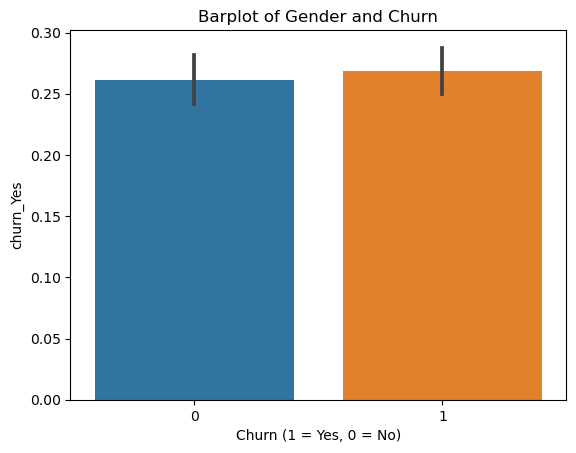

In [7]:
acq.plot_gender_churn(X_train, y_train)

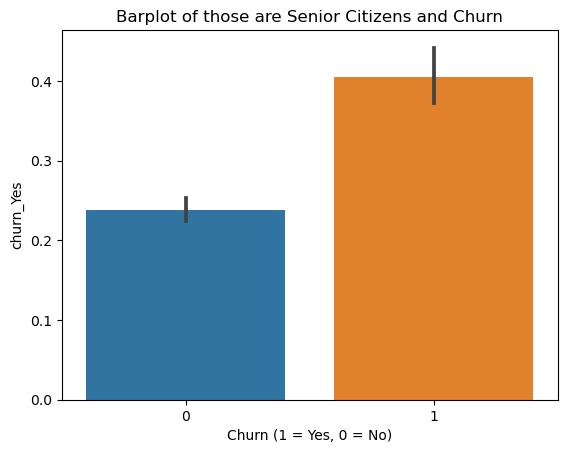

In [8]:
acq.plot_senior_citizen_Yes_churn(X_train, y_train)

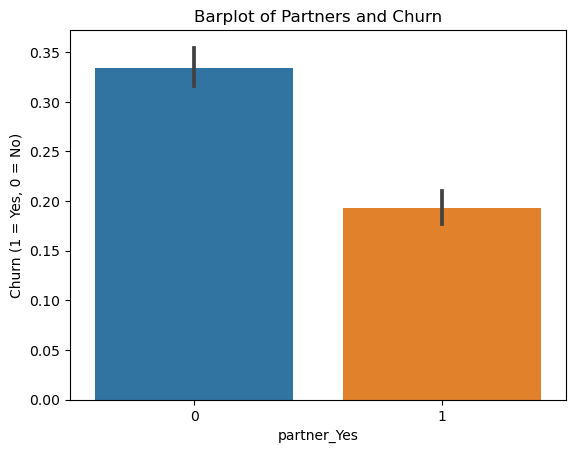

In [10]:
# Do people with dependents churn more?

sns.barplot(X_train.partner_Yes, y_train.churn_Yes)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Partners and Churn')

# Show the plot
plt.show()

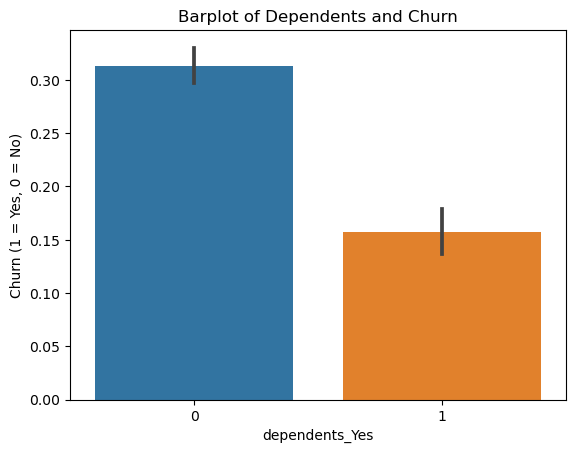

In [11]:
# Do people with partners churn more?

sns.barplot(X_train.dependents_Yes, y_train.churn_Yes)

# Add labels and title
plt.ylabel('Churn (1 = Yes, 0 = No)')
plt.title('Barplot of Dependents and Churn')

# Show the plot
plt.show()

## Exploration Summary

    - Gender doesn't have a significant affect on churn
    - There is a stronger relationship between churn and whether the customers have children, and/or partners
    
## Modeling

    - I will use accuracy as my evaluation metric
    - My baseline accuracy was 73.4%
    - I was not able to beat the baseline accuracy of 73.4, only achieving a baseline accuracy of 73% 
    
## Decision Tree

In [12]:
acq.train_validate_accuracy_dt(X_train, y_train, X_validate, y_validate)

for depth of  1, the train accuracy is 0.73
for depth of  1, the validate accuracy is 0.73

for depth of  2, the train accuracy is 0.73
for depth of  2, the validate accuracy is 0.73

for depth of  3, the train accuracy is 0.73
for depth of  3, the validate accuracy is 0.73



## Random Forest

In [13]:
tree = RandomForestClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)
tree.score(X_validate, y_validate)

0.7345635202271115

In [14]:
for x in range(1,5):
#     print(x)
    tree = RandomForestClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    acc = tree.score(X_train, y_train)
    val = tree.score(X_validate, y_validate)
    print(f'for depth of {x:2}, the train accuracy is {round(acc,2)}')
    print(f'for depth of {x:2}, the validate accuracy is {round(val,2)}')
    print()

for depth of  1, the train accuracy is 0.73
for depth of  1, the validate accuracy is 0.73

for depth of  2, the train accuracy is 0.73
for depth of  2, the validate accuracy is 0.73

for depth of  3, the train accuracy is 0.73
for depth of  3, the validate accuracy is 0.73

for depth of  4, the train accuracy is 0.73
for depth of  4, the validate accuracy is 0.73



## Comparing Models

Neither DecisionTree nor RandomForest were able to beat my baseline accuracy of 73.4 

# Conclusions

### Exploration

Gender doesn't seem to be strongly associated with churn. There is a stronger relationship between churn and whether the customers are senior citizents, have children, and/or partners.

### Modeling

The final model signinficantly outperformed the baseline

### Recommendations 

Offer discounts to senior citizens to reduce churn, and family bundle discounts to fortify the lower churn rate of those with partners and dependents.

### Next Steps

Do additional analysis comparing combinations of features to find the highest combinations of churn.